In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier

In [2]:
origdata = pd.read_csv('train.csv')

In [3]:
origdata.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
origdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
# data = origdata.copy()
data = origdata.drop(columns=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])
data['Spendings'] = origdata['RoomService'].fillna(origdata['RoomService'].mean()) + origdata['FoodCourt'].fillna(origdata['FoodCourt'].mean()).values + origdata['ShoppingMall'].fillna(origdata['ShoppingMall'].mean()).values + origdata['Spa'].fillna(origdata['Spa'].mean()).values + origdata['VRDeck'].fillna(origdata['VRDeck'].mean()).values

In [6]:
# data.dropna(inplace=True)
# data.convert_dtypes()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  8693 non-null   object 
 1   HomePlanet   8492 non-null   object 
 2   CryoSleep    8476 non-null   object 
 3   Cabin        8494 non-null   object 
 4   Destination  8511 non-null   object 
 5   Age          8514 non-null   float64
 6   VIP          8490 non-null   object 
 7   Name         8493 non-null   object 
 8   Transported  8693 non-null   bool   
 9   Spendings    8693 non-null   float64
dtypes: bool(1), float64(2), object(7)
memory usage: 619.8+ KB


In [7]:
data['PassengerId'] = data['PassengerId'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  8693 non-null   float64
 1   HomePlanet   8492 non-null   object 
 2   CryoSleep    8476 non-null   object 
 3   Cabin        8494 non-null   object 
 4   Destination  8511 non-null   object 
 5   Age          8514 non-null   float64
 6   VIP          8490 non-null   object 
 7   Name         8493 non-null   object 
 8   Transported  8693 non-null   bool   
 9   Spendings    8693 non-null   float64
dtypes: bool(1), float64(3), object(6)
memory usage: 619.8+ KB


In [8]:
for col in ['Cabin', 'Destination', 'HomePlanet']:
    tmp = list(data[col].unique())
    tmparr = [tmp.index(i) + 1 for i in data[col]]
    data[col] = pd.DataFrame(tmparr)
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,Spendings
0,101.0,1,False,1,1,39.0,False,Maham Ofracculy,False,0.0
1,201.0,2,False,2,1,24.0,False,Juanna Vines,True,736.0
2,301.0,1,False,3,1,58.0,True,Altark Susent,False,10383.0
3,302.0,1,False,3,1,33.0,False,Solam Susent,False,5176.0
4,401.0,2,False,4,1,16.0,False,Willy Santantines,True,1091.0


In [9]:
# data.dropna(inplace=True)

# tmp = list(set(map(
#     lambda x: x[0], list(data['Name'])
# )))
# tmparr = [tmp.index(i[0]) + 1 for i in data['Name']] + [0] * np.sum(data['Name'].isna())
# data['Name'] = pd.DataFrame(tmparr)
# data.head()

data.drop(columns='Name', inplace=True)

In [12]:
data.dropna(inplace=True)
data['CryoSleep'] = data['CryoSleep'].astype(int)
data['VIP'] = data['VIP'].astype(int)
data['Transported'] = data['Transported'].astype(int)
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported,Spendings
0,101.0,1,0,1,1,39.0,0,0,0.0
1,201.0,2,0,2,1,24.0,0,1,736.0
2,301.0,1,0,3,1,58.0,1,0,10383.0
3,302.0,1,0,3,1,33.0,0,0,5176.0
4,401.0,2,0,4,1,16.0,0,1,1091.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8108 entries, 0 to 8692
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  8108 non-null   float64
 1   HomePlanet   8108 non-null   int64  
 2   CryoSleep    8108 non-null   int32  
 3   Cabin        8108 non-null   int64  
 4   Destination  8108 non-null   int64  
 5   Age          8108 non-null   float64
 6   VIP          8108 non-null   int32  
 7   Transported  8108 non-null   int32  
 8   Spendings    8108 non-null   float64
dtypes: float64(3), int32(3), int64(3)
memory usage: 538.4 KB


In [14]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)

In [15]:
data.drop(columns='Transported')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Spendings
0,101.0,1,0,1,1,39.0,0,0.0
1,201.0,2,0,2,1,24.0,0,736.0
2,301.0,1,0,3,1,58.0,1,10383.0
3,302.0,1,0,3,1,33.0,0,5176.0
4,401.0,2,0,4,1,16.0,0,1091.0
...,...,...,...,...,...,...,...,...
8688,927601.0,1,0,6558,3,41.0,1,8536.0
8689,927801.0,2,1,6559,2,18.0,0,0.0
8690,927901.0,2,0,6560,1,26.0,0,1873.0
8691,928001.0,1,0,6561,3,32.0,0,4637.0


In [16]:
data['Transported']

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8108, dtype: int32

In [17]:
data.dropna(inplace=True)
clf.fit(data.drop(columns='Transported'), data['Transported'])

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)

In [18]:
data.drop(columns='Transported')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Spendings
0,101.0,1,0,1,1,39.0,0,0.0
1,201.0,2,0,2,1,24.0,0,736.0
2,301.0,1,0,3,1,58.0,1,10383.0
3,302.0,1,0,3,1,33.0,0,5176.0
4,401.0,2,0,4,1,16.0,0,1091.0
...,...,...,...,...,...,...,...,...
8688,927601.0,1,0,6558,3,41.0,1,8536.0
8689,927801.0,2,1,6559,2,18.0,0,0.0
8690,927901.0,2,0,6560,1,26.0,0,1873.0
8691,928001.0,1,0,6561,3,32.0,0,4637.0


In [19]:
from sklearn import tree

In [20]:
tree.export_text(clf)

'|--- feature_7 <= 513.50\n|   |--- feature_1 <= 1.50\n|   |   |--- feature_2 <= 0.50\n|   |   |   |--- feature_5 <= 22.00\n|   |   |   |   |--- class: 1\n|   |   |   |--- feature_5 >  22.00\n|   |   |   |   |--- feature_0 <= 406751.00\n|   |   |   |   |   |--- feature_3 <= 1110.50\n|   |   |   |   |   |   |--- class: 0\n|   |   |   |   |   |--- feature_3 >  1110.50\n|   |   |   |   |   |   |--- class: 0\n|   |   |   |   |--- feature_0 >  406751.00\n|   |   |   |   |   |--- feature_5 <= 39.00\n|   |   |   |   |   |   |--- class: 1\n|   |   |   |   |   |--- feature_5 >  39.00\n|   |   |   |   |   |   |--- class: 1\n|   |   |--- feature_2 >  0.50\n|   |   |   |--- feature_5 <= 13.50\n|   |   |   |   |--- feature_3 <= 3246.50\n|   |   |   |   |   |--- class: 1\n|   |   |   |   |--- feature_3 >  3246.50\n|   |   |   |   |   |--- class: 1\n|   |   |   |--- feature_5 >  13.50\n|   |   |   |   |--- feature_5 <= 35.50\n|   |   |   |   |   |--- feature_4 <= 1.50\n|   |   |   |   |   |   |--- fe

In [21]:
import matplotlib.pyplot as plt

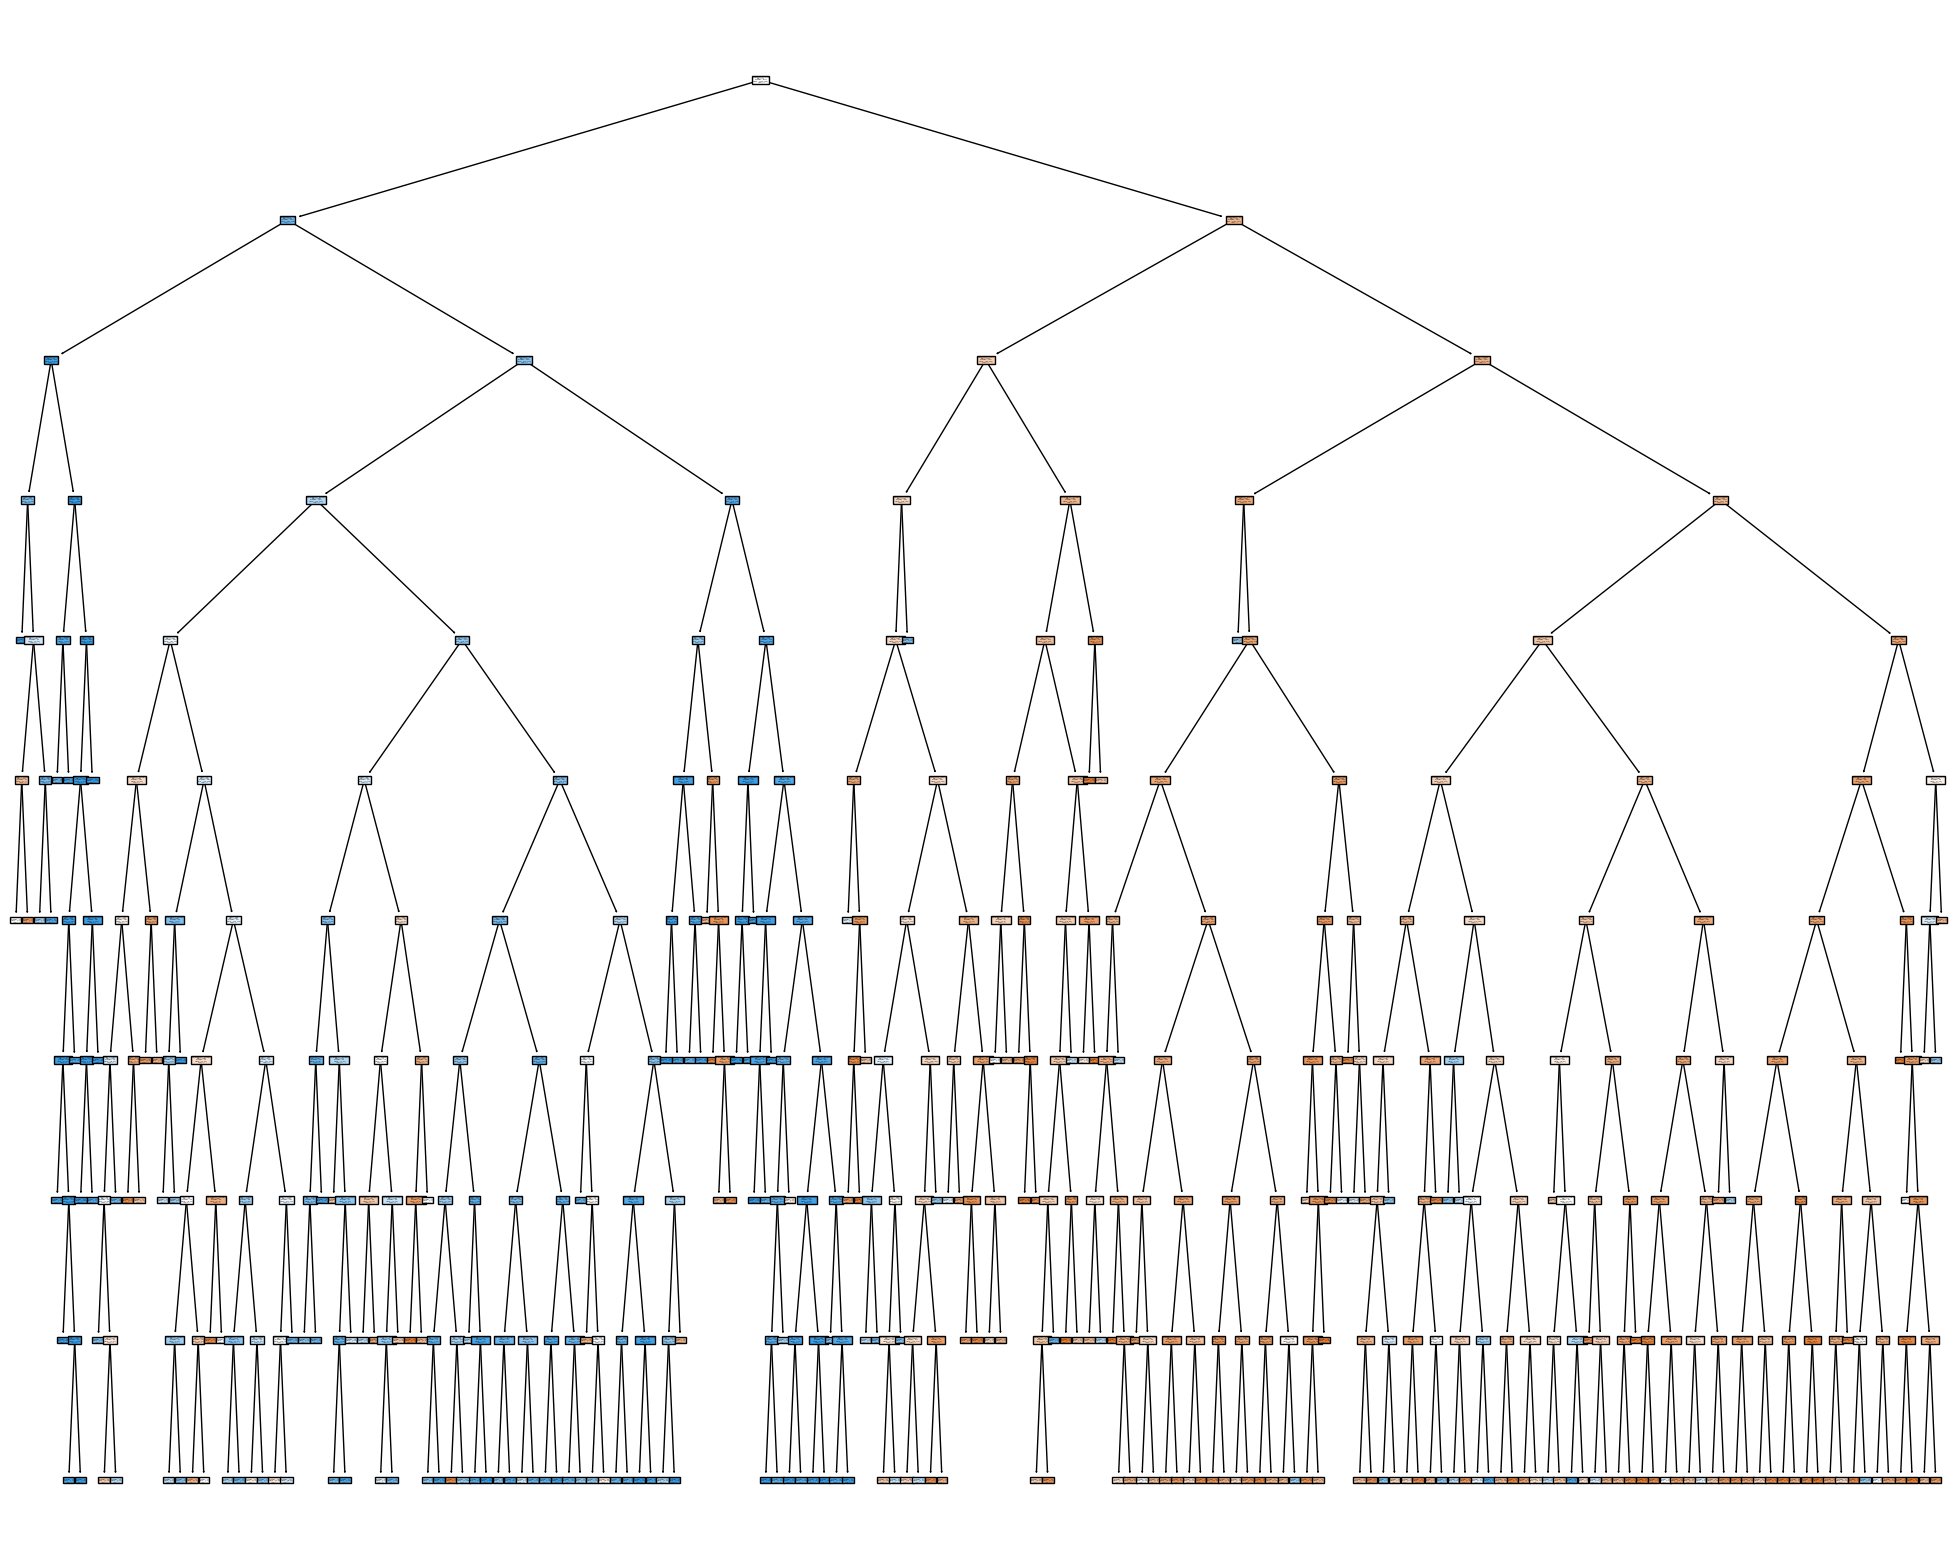

In [22]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=data.columns[:-1],  
                   class_names=data.columns[-1],
                   filled=True)
fig.savefig('decisionTree_new.png', dpi=600)